In [275]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re

# 1.Overview

In [276]:
df = pd.read_csv('./data/Billionaires Statistics Dataset.csv')
pd.options.display.float_format = '{:,.2f}'.format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [277]:
df['gdp_country'] = df['gdp_country'].str.replace('$', '').str.replace(',', '').astype('float64')
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.00,France,Paris,LVMH,Fashion & Retail,France,...,1.10,"2,715,518,274,227.00",65.60,102.50,82.50,24.20,60.70,"67,059,887.00",46.23,2.21
1,2,180000,Automotive,Elon Musk,51.00,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.50,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00",37.09,-95.71
2,3,114000,Technology,Jeff Bezos,59.00,United States,Medina,Amazon,Technology,United States,...,7.50,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00",37.09,-95.71
3,4,107000,Technology,Larry Ellison,78.00,United States,Lanai,Oracle,Technology,United States,...,7.50,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00",37.09,-95.71
4,5,106000,Finance & Investments,Warren Buffett,92.00,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.50,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00",37.09,-95.71


In [278]:
def Overview(df, col_type):
    view = df.select_dtypes(include = col_type)
    summary = pd.DataFrame(view.dtypes, columns= ['type'])
    summary['missing'] = view.isnull().sum()
    summary['%missing'] = view.isnull().sum() / df.shape[0] * 100
    summary = pd.concat([summary,view.describe().T], axis= 1)
    summary = summary.drop(['count'], axis= 1)
    return summary

In [279]:
Overview(df, ['int64', 'float64'])

,type,missing,%missing,mean,std,min,25%,50%,75%,max
rank,int64,0,0.00,"1,289.16",739.69,1.00,659.00,"1,312.00","1,905.00","2,540.00"
finalWorth,int64,0,0.00,"4,623.79","9,834.24","1,000.00","1,500.00","2,300.00","4,200.00","211,000.00"
age,float64,65,2.46,65.14,13.26,18.00,56.00,65.00,75.00,101.00
birthYear,float64,76,2.88,"1,957.18",13.28,"1,921.00","1,948.00","1,957.00","1,966.00","2,004.00"
birthMonth,float64,76,2.88,5.74,3.71,1.00,2.00,6.00,9.00,12.00
birthDay,float64,76,2.88,12.10,9.92,1.00,1.00,11.00,21.00,31.00
cpi_country,float64,184,6.97,127.76,26.45,99.55,117.24,117.24,125.08,288.57
cpi_change_country,float64,184,6.97,4.36,3.62,-1.90,1.70,2.90,7.50,53.50
gdp_country,float64,164,6.21,"11,582,873,303,921.56","9,575,588,391,938.20","3,154,057,987.00","1,736,425,629,520.00","19,910,000,000,000.00","21,427,700,000,000.00","21,427,700,000,000.00"
gross_tertiary_education_enrollment,float64,182,6.89,67.23,21.34,4.00,50.60,65.60,88.20,136.60


In [280]:
Overview(df, ['object', 'bool'])

,type,missing,%missing,unique,top,freq
category,object,0,0.00,18,Finance & Investments,372
personName,object,0,0.00,2638,Wang Yanqing & family,2
country,object,38,1.44,78,United States,754
city,object,72,2.73,741,New York,99
source,object,0,0.00,906,Real estate,151
industries,object,0,0.00,18,Finance & Investments,372
countryOfCitizenship,object,0,0.00,77,United States,735
organization,object,2315,87.69,294,Meta Platforms,4
selfMade,bool,0,0.00,2,True,1812
status,object,0,0.00,6,D,1223


# 2.Preprocessing

In [281]:
usa_df = df[df['country'] == 'United States']
df.drop(['organization', 'title', 'date', 'residenceStateRegion', 'firstName', 'state',
         'lastName', 'longitude_country', 'latitude_country', 'birthMonth', 'birthDay', 
         'cpi_country', 'cpi_change_country'],axis= 1, inplace= True)

In [282]:
df['country'].fillna(df['countryOfCitizenship'], inplace=True)

In [283]:
mode_fill_col = ['age', 'birthDate', 'birthYear']
for col in mode_fill_col:
    df[col] = df[col].fillna(df[col].mode()[0])

In [284]:
nan_col = df.isna().sum()
nan_col = nan_col[nan_col > 0]
for col in nan_col.index:
    for i in df['country'].unique():
        x = df[df['country'] == i]
        mode_value = x[col].mode()[0]
        df[col] = df[col].fillna(mode_value)

In [285]:
df.isna().sum().sum()

0

In [286]:
df.duplicated().sum()

0

In [287]:
df['birthYear']=df['birthYear'].astype(int)

df['birthDate']=pd.to_datetime(df['birthDate'])

In [288]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,gender,birthDate,birthYear,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.00,France,Paris,LVMH,Fashion & Retail,France,...,M,1949-03-05,1949,"2,715,518,274,227.00",65.60,102.50,82.50,24.20,60.70,"67,059,887.00"
1,2,180000,Automotive,Elon Musk,51.00,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,M,1971-06-28,1971,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00"
2,3,114000,Technology,Jeff Bezos,59.00,United States,Medina,Amazon,Technology,United States,...,M,1964-01-12,1964,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00"
3,4,107000,Technology,Larry Ellison,78.00,United States,Lanai,Oracle,Technology,United States,...,M,1944-08-17,1944,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00"
4,5,106000,Finance & Investments,Warren Buffett,92.00,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,M,1930-08-30,1930,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,36.60,"328,239,523.00"


# 3. Visualize

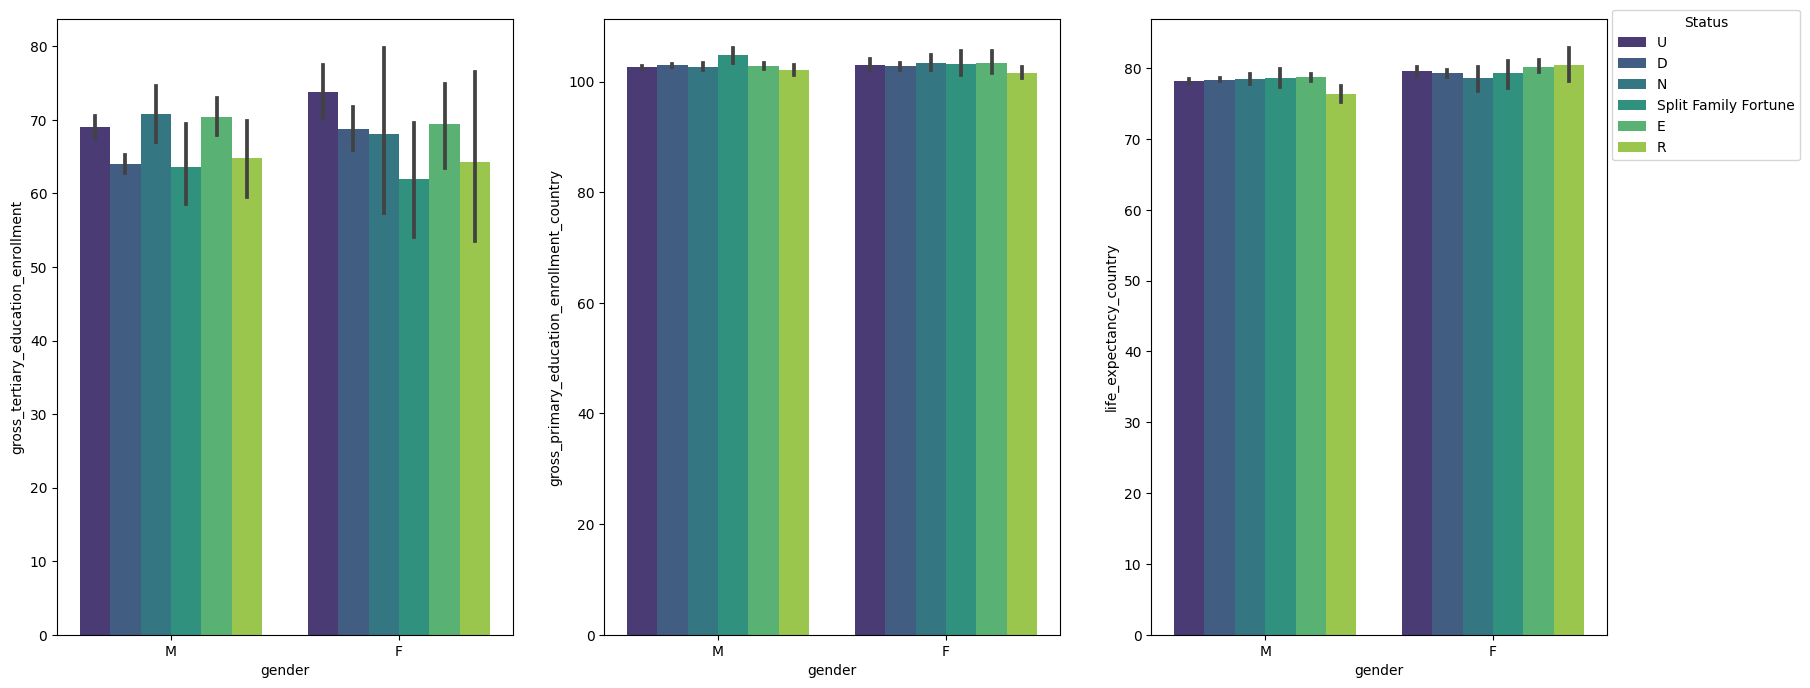

In [289]:
billion_env = ['gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country', 'life_expectancy_country']

fig, axes = plt.subplots(1, len(billion_env), figsize = (20,8))
labels = df['status'].unique()

for i, col in enumerate(billion_env):
    sns.barplot(df, x= 'gender', y= col, ax = axes[i], hue='status', palette= 'viridis')
    h,l = axes[i].get_legend_handles_labels()
    if i == 0:
        legend = axes[i].get_legend()
        handles = legend.legend_handles
    axes[i].legend([], [], frameon=False)

fig.legend(handles, labels, bbox_to_anchor = (1,0.9), fontsize = 10, title = 'Status')
plt.show()

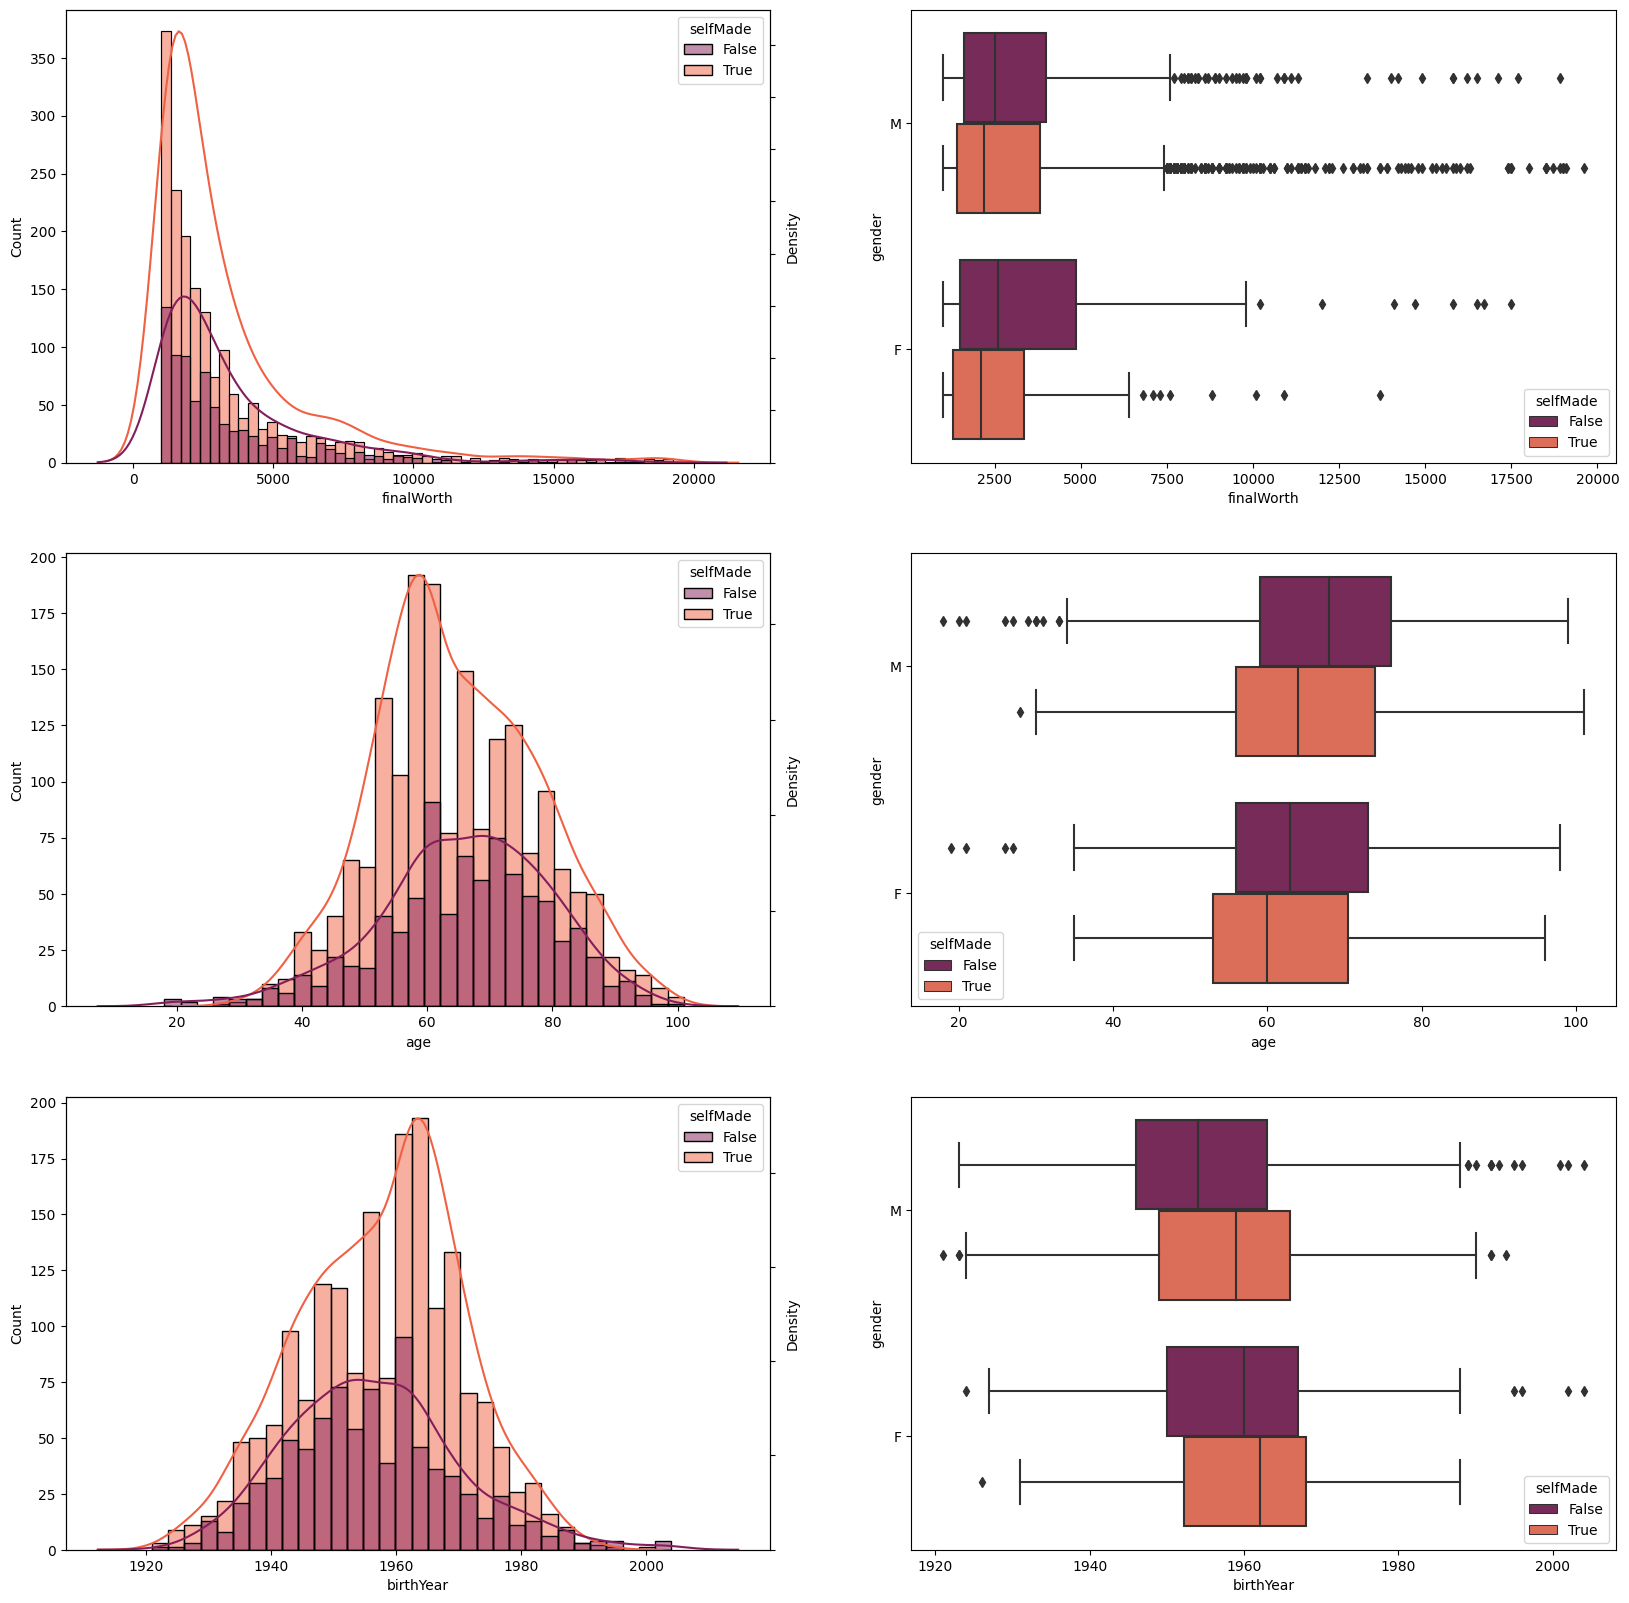

In [290]:
wealth_col = ['finalWorth', 'age', 'birthYear']
limit = [20000, 1000000, 1000000]
fig, axes = plt.subplots(3, 2, figsize = (20, 20))

for i, col in enumerate(wealth_col):
    sns.histplot(df[df['finalWorth'] < limit[i]], x = col, hue='selfMade', ax= axes[i][0], palette= 'rocket')
    axes1 = axes[i][0].twinx()
    sns.kdeplot(df[df['finalWorth'] < limit[i]], x = col, hue='selfMade', ax= axes1, palette= 'rocket')
    axes1.legend([], [], frameon = False)
    axes1.set_yticklabels([])
    sns.boxplot(df[df['finalWorth'] < limit[i]], x = col, y = 'gender', hue= 'selfMade', ax = axes[i][1], palette= 'rocket')



In [302]:
fig = px.treemap(df, path = ['industries', 'country', 'selfMade'], values= 'finalWorth')
fig.update_traces(root_color="lightgrey", textinfo = "label + percent entry")
fig.update_layout(
    title_text = "Wealth Distribution by Industry and Country",
    autosize=False,
    width=1000,
    height=500,
    margin = dict(l=10, r=10, b=10, t=50, pad=4))
fig.show()

In [292]:
world_df = df[['finalWorth', 'country']].groupby('country').sum()
fig = go.Figure(go.Choropleth(
    locations = world_df.index,                                 
    z = world_df.finalWorth,
    text = world_df.index,
    locationmode='country names',                                  
    colorscale = 'greens', 
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'Total Worth'
))
fig.update_layout(
    title_text="Billionaires's country Total Worth",
    autosize=False,
    width=900,
    height=400,
    margin=dict(
        l=10, r=10, b=50, t=50, pad=4
    ),
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
)

In [293]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

def best_match(x):
    for a,n in states.items():
        if x == n:
            return a
 
usa_df['state'] = usa_df['state'].apply(lambda x: best_match(x))

/tmp/ipykernel_635/3994765573.py:66: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [326]:
for gender in df.gender.unique():
    usa = usa_df[usa_df['gender'] == gender][['finalWorth', 'state']].groupby('state').sum()
    fig = px.choropleth(usa, locationmode='USA-states', locations=usa.index,
                        scope= 'usa', color= 'finalWorth', color_continuous_scale="mint", 
                        title= "Total Worth in USA (Male)" if gender == "M" else "Total Worth in USA (Female)")
    fig.show()

In [295]:
fig = px.choropleth(world_df, locationmode='country names', locations= world_df.index,
                        scope='asia', color='finalWorth', color_continuous_scale="mint")
fig.update_geos(fitbounds="locations", visible=True)
fig.show()